# Goals

Optimalisasi campaign result terkait penawaran produk baru sehingga mendapatkan profit yang maksimal dibulan depan dan memahami karakteristik customers yang menerima penarawan produk tersebut.


# Data Quality

Q1: Apakah ada features yang data type-nya tidak sesuai?
Q2: Adakah duplicate, missing Value atau outliers? bagaimana mengatasi hal tersebut?
Q3: Apakah terdapat distibusi yang tidak masuk akal?

In [1]:
!pip install matplotlib
!pip install seaborn
!pip install -U scikit-learn scipy matplotlib

In [2]:
import sys
print(sys.executable)


C:\Users\LENOVO\AppData\Local\Programs\Python\Python312\python.exe


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)
sns.set_context('notebook')
sns.set_style('whitegrid')
sns.set_palette('Spectral')


import warnings
warnings.filterwarnings('ignore')

In [4]:
data = pd.read_csv('marketing_data.csv')
data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
0,1826,1970,Graduation,Divorced,"$84,835.00",0,0,6/16/14,0,189,104,379,111,189,218,1,4,4,6,1,0,0,0,0,0,1,0,SP
1,1,1961,Graduation,Single,"$57,091.00",0,0,6/15/14,0,464,5,64,7,0,37,1,7,3,7,5,0,0,0,0,1,1,0,CA
2,10476,1958,Graduation,Married,"$67,267.00",0,1,5/13/14,0,134,11,59,15,2,30,1,3,2,5,2,0,0,0,0,0,0,0,US
3,1386,1967,Graduation,Together,"$32,474.00",1,1,5/11/14,0,10,0,1,0,0,0,1,1,0,2,7,0,0,0,0,0,0,0,AUS
4,5371,1989,Graduation,Single,"$21,474.00",1,0,4/8/14,0,6,16,24,11,0,34,2,3,1,2,7,1,0,0,0,0,1,0,SP


In [5]:
data.shape

(2240, 28)

# Question 1
Apakah ada features yang data type-nya tidak sesuai? 

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   2240 non-null   int64 
 1   Year_Birth           2240 non-null   int64 
 2   Education            2240 non-null   object
 3   Marital_Status       2240 non-null   object
 4    Income              2216 non-null   object
 5   Kidhome              2240 non-null   int64 
 6   Teenhome             2240 non-null   int64 
 7   Dt_Customer          2240 non-null   object
 8   Recency              2240 non-null   int64 
 9   MntWines             2240 non-null   int64 
 10  MntFruits            2240 non-null   int64 
 11  MntMeatProducts      2240 non-null   int64 
 12  MntFishProducts      2240 non-null   int64 
 13  MntSweetProducts     2240 non-null   int64 
 14  MntGoldProds         2240 non-null   int64 
 15  NumDealsPurchases    2240 non-null   int64 
 16  NumWeb

In [7]:
# Conculsion: Income and Dt_customers

In [8]:
data.columns = data.columns.str.replace(' ', '')

In [9]:
data.Income

0       $84,835.00 
1       $57,091.00 
2       $67,267.00 
3       $32,474.00 
4       $21,474.00 
           ...     
2235    $66,476.00 
2236    $31,056.00 
2237    $46,310.00 
2238    $65,819.00 
2239    $94,871.00 
Name: Income, Length: 2240, dtype: object

In [10]:
data['Income'] = data['Income'].str.replace('$','')
data['Income'] = data['Income'].str.replace(',','')

In [11]:
data.Income

0       84835.00 
1       57091.00 
2       67267.00 
3       32474.00 
4       21474.00 
          ...    
2235    66476.00 
2236    31056.00 
2237    46310.00 
2238    65819.00 
2239    94871.00 
Name: Income, Length: 2240, dtype: object

In [12]:
data['Income'] = data['Income'].astype('float')
data['Dt_Customer'] = pd.to_datetime(data['Dt_Customer'])

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2240 non-null   int64         
 1   Year_Birth           2240 non-null   int64         
 2   Education            2240 non-null   object        
 3   Marital_Status       2240 non-null   object        
 4   Income               2216 non-null   float64       
 5   Kidhome              2240 non-null   int64         
 6   Teenhome             2240 non-null   int64         
 7   Dt_Customer          2240 non-null   datetime64[ns]
 8   Recency              2240 non-null   int64         
 9   MntWines             2240 non-null   int64         
 10  MntFruits            2240 non-null   int64         
 11  MntMeatProducts      2240 non-null   int64         
 12  MntFishProducts      2240 non-null   int64         
 13  MntSweetProducts     2240 non-nul

# Question 2
Adakah duplicate, missing Value atau outliers?

### Duplicate

In [14]:
data.duplicated().sum()

np.int64(0)

### Missing Value

In [15]:
data.isna().sum().sort_values(ascending =False)

Income                 24
ID                      0
Education               0
Year_Birth              0
Marital_Status          0
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Response                0
Complain                0
Country                 0
dtype: int64

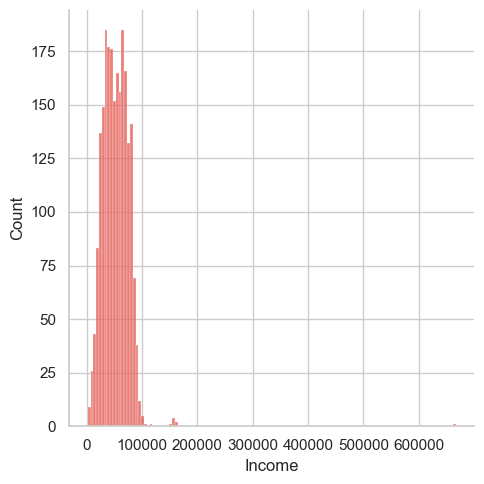

In [16]:
sns.displot(data['Income'], kde=False)

<Axes: >

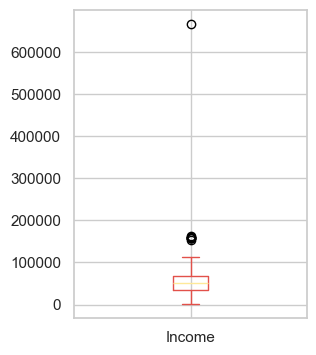

In [17]:
data['Income'].plot(kind='box',figsize = (3,4))

In [18]:
data['Income'] = data['Income'].fillna(data['Income'].median())

### Outliers

In [19]:
data.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Response', 'Complain', 'Country'],
      dtype='object')

In [20]:
data_to_plot = data.select_dtypes(include=['float','int'])
data_to_plot.drop(columns=['ID', 'AcceptedCmp1','AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5',
                          'Response','Complain'], inplace=True)

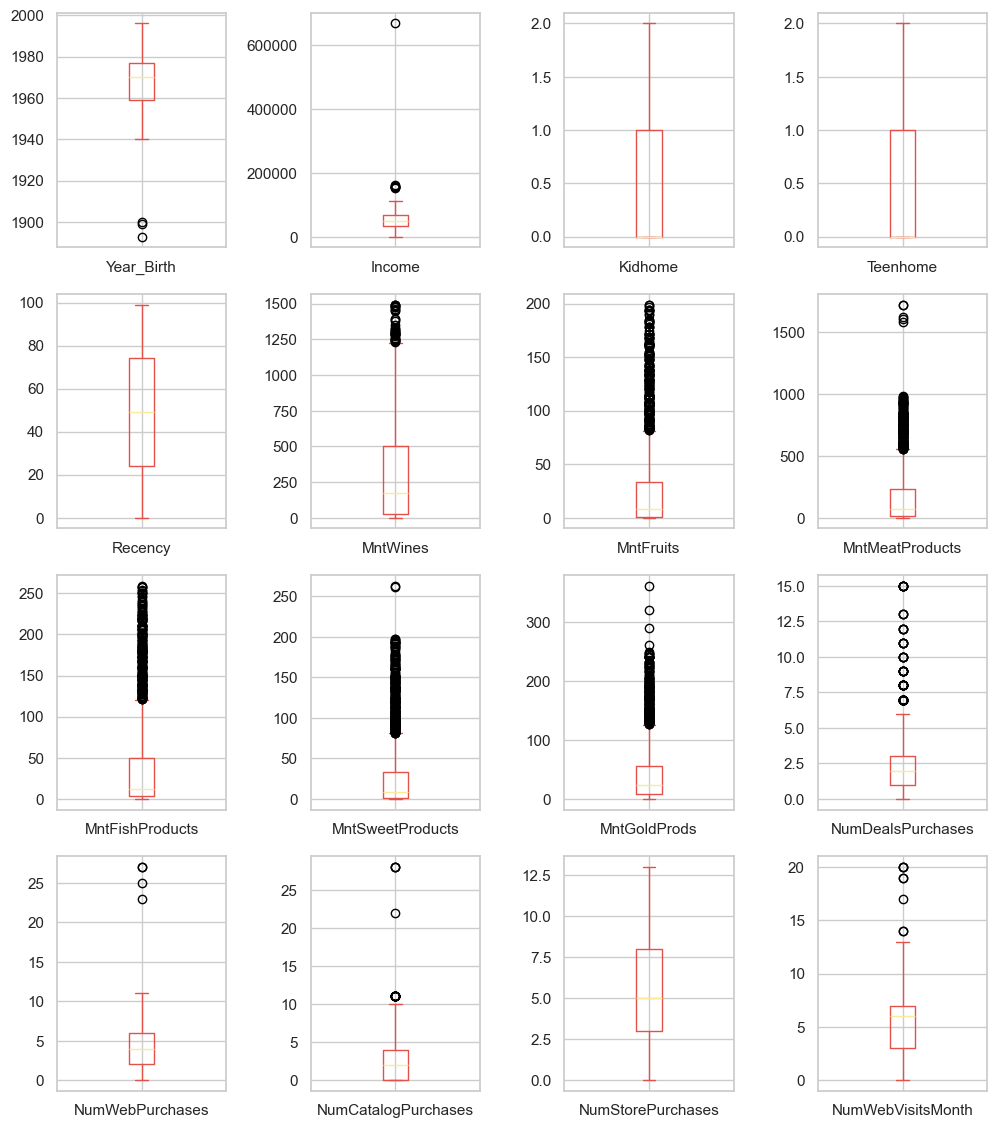

In [21]:
data_to_plot.plot(subplots=True, layout = (4,4), kind='box', figsize=(12,14))
plt.subplots_adjust(wspace=0.5);

In [22]:
data = data[data['Year_Birth'] > 1900].reset_index(drop=True)

# Question 3
Apakah terdapat distibusi data yang tidak masuk akal?

In [23]:
numeric = data_to_plot.columns
numeric

Index(['Year_Birth', 'Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines',
       'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth'],
      dtype='object')

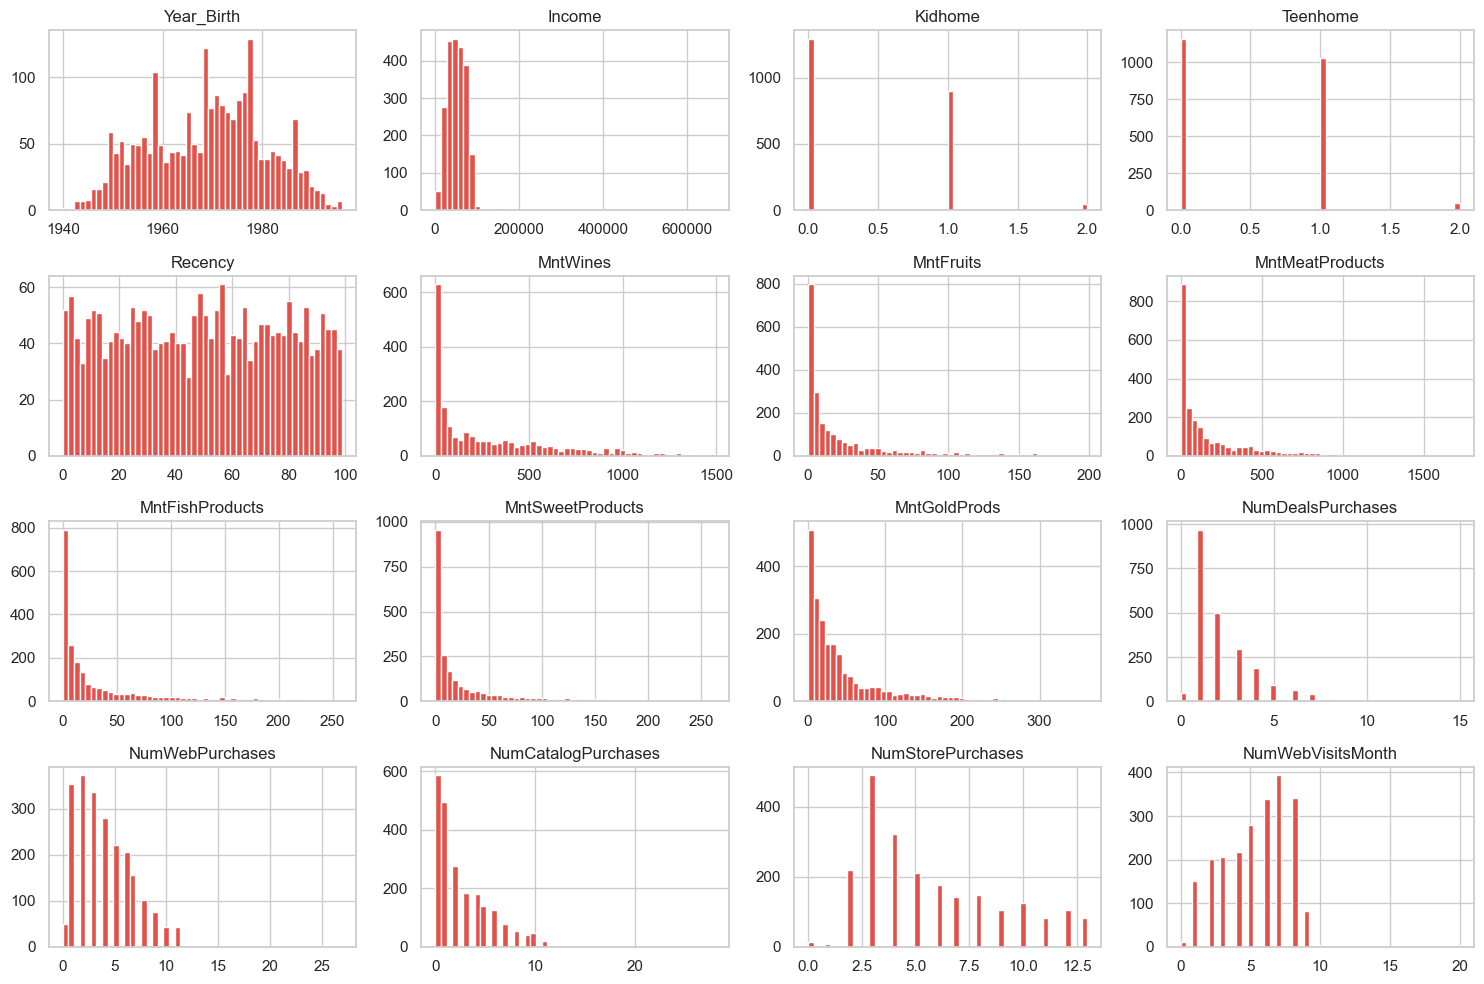

In [24]:
fig = plt.figure(figsize=(15,10))
ax = plt.gca()

data.hist(bins=50, ax=ax, layout=(4,4), column=numeric)
plt.tight_layout()
plt.show()

# Data Insight

### Year_Birth

In [25]:
data['Customer_age'] = data['Dt_Customer'].dt.year - data['Year_Birth']

<Axes: xlabel='Customer_age', ylabel='Count'>

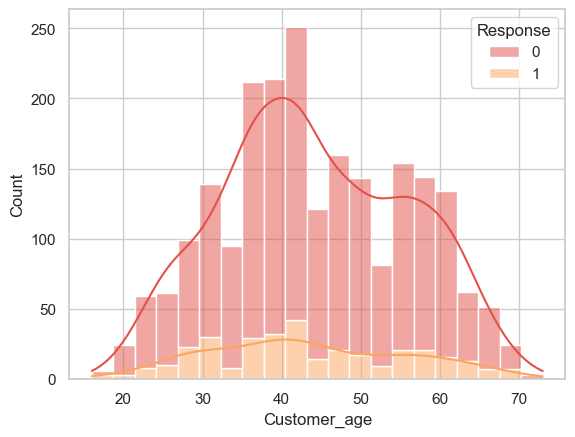

In [26]:
sns.histplot(data=data, x='Customer_age', hue='Response', multiple='stack', kde=True)

## Education

In [27]:
data.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Response', 'Complain', 'Country', 'Customer_age'],
      dtype='object')

In [28]:
data.Education.unique()

array(['Graduation', 'PhD', '2n Cycle', 'Master', 'Basic'], dtype=object)

<Axes: xlabel='Education', ylabel='count'>

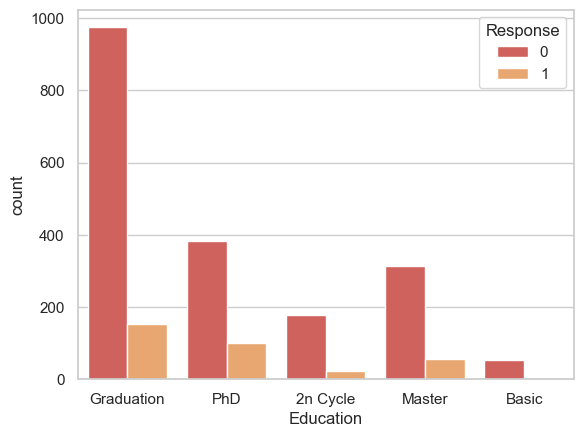

In [29]:
sns.countplot(data=data, x='Education', hue='Response')

In [30]:
def Barpect(data, xVar, ax):
    '''
    barPect(): add percentage for hue to bar plots 
    args:
        data: pandas dataframe 
        xVar: (string) x Variable 
        ax: Axes object (for Seaborn Countplot/Bar plot or pandas bar plot)
    '''
    # 1. How many X categories
    ## check for NaN and Remove 
    numX=len([x for x in data[xVar].unique() if x==x])
    
    # 2. The bars are created in hue orders, organize them  
    bars = ax.patches
    ## 2a. For each X Variable
    for ind in range(numX):
        ## 2b. Get every hue bar
        ## ex. 8 X categories, 4 hue =>
        ## [0, 8, 16, 24] are hue bars for 1st X category
        hueBars=bars[ind:][::numX]
        ## 2c. Get the modal height (for percentages)
        total = sum([x.get_height() for x in hueBars])

        # 3. Print the percentage on the bars, check if total is greater than 0
        if total > 0:
            for bar in hueBars:
                ax.text(bar.get_x() + bar.get_width()/2.,
                        bar.get_height(),
                        f'{bar.get_height()/total:.0%}',
                        ha="center", va="bottom")

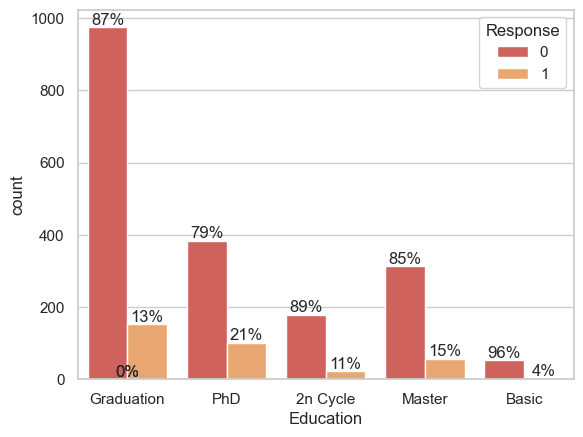

In [31]:
ax = sns.countplot(x='Education', hue='Response', data=data)
Barpect(data, 'Education', ax)

(0.0, 175000.0)

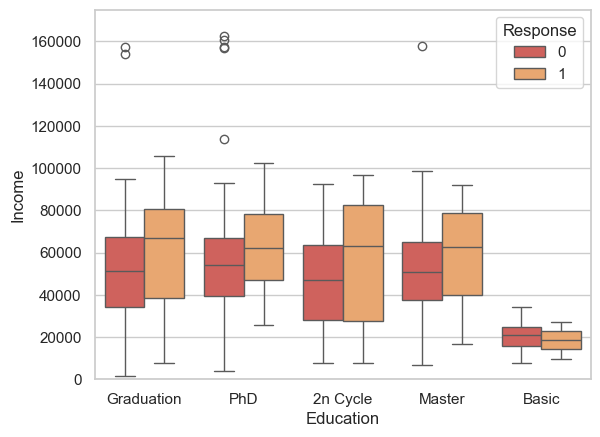

In [32]:
sns.boxplot(data=data, x='Education', y='Income', hue='Response')
plt.ylim(0, 175000)

# Income lebih tinggi pasti menerima/membeli Penawaran Campaign 

## Marital Status

In [33]:
data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country,Customer_age
0,1826,1970,Graduation,Divorced,84835.0,0,0,2014-06-16,0,189,104,379,111,189,218,1,4,4,6,1,0,0,0,0,0,1,0,SP,44
1,1,1961,Graduation,Single,57091.0,0,0,2014-06-15,0,464,5,64,7,0,37,1,7,3,7,5,0,0,0,0,1,1,0,CA,53
2,10476,1958,Graduation,Married,67267.0,0,1,2014-05-13,0,134,11,59,15,2,30,1,3,2,5,2,0,0,0,0,0,0,0,US,56
3,1386,1967,Graduation,Together,32474.0,1,1,2014-05-11,0,10,0,1,0,0,0,1,1,0,2,7,0,0,0,0,0,0,0,AUS,47
4,5371,1989,Graduation,Single,21474.0,1,0,2014-04-08,0,6,16,24,11,0,34,2,3,1,2,7,1,0,0,0,0,1,0,SP,25


In [34]:
data.Marital_Status.unique()

array(['Divorced', 'Single', 'Married', 'Together', 'Widow', 'YOLO',
       'Alone', 'Absurd'], dtype=object)

In [35]:
data['Marital_Status'] = data['Marital_Status'].apply(lambda x:'Single' if str(x) in ['YOLO', 'Alone', 'Absurd'] else str(x))

In [36]:
data.Marital_Status.unique()

array(['Divorced', 'Single', 'Married', 'Together', 'Widow'], dtype=object)

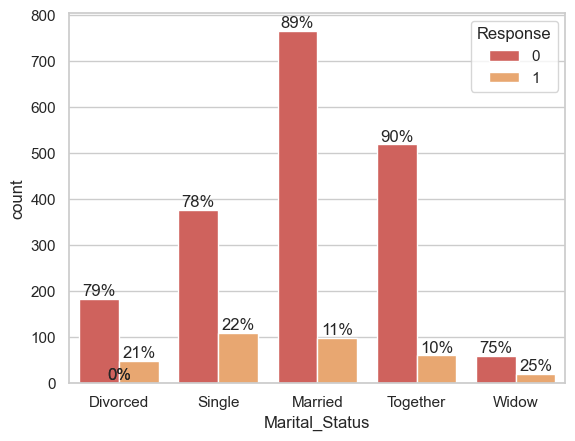

In [37]:
ax = sns.countplot(x='Marital_Status', hue='Response', data=data)
Barpect(data, 'Marital_Status', ax)

## KidHome and TeenHome

In [38]:
data['Num_dependants'] = data['Kidhome'] + data['Teenhome']

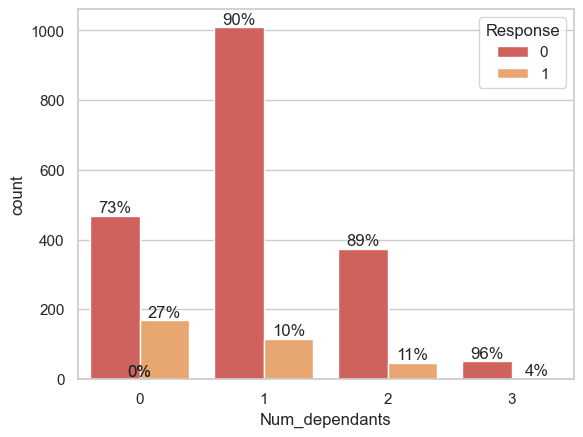

In [39]:
ax = sns.countplot(x='Num_dependants', hue='Response', data=data)
Barpect(data, 'Num_dependants', ax)

## Customer join 

In [40]:
data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country,Customer_age,Num_dependants
0,1826,1970,Graduation,Divorced,84835.0,0,0,2014-06-16,0,189,104,379,111,189,218,1,4,4,6,1,0,0,0,0,0,1,0,SP,44,0
1,1,1961,Graduation,Single,57091.0,0,0,2014-06-15,0,464,5,64,7,0,37,1,7,3,7,5,0,0,0,0,1,1,0,CA,53,0
2,10476,1958,Graduation,Married,67267.0,0,1,2014-05-13,0,134,11,59,15,2,30,1,3,2,5,2,0,0,0,0,0,0,0,US,56,1
3,1386,1967,Graduation,Together,32474.0,1,1,2014-05-11,0,10,0,1,0,0,0,1,1,0,2,7,0,0,0,0,0,0,0,AUS,47,2
4,5371,1989,Graduation,Single,21474.0,1,0,2014-04-08,0,6,16,24,11,0,34,2,3,1,2,7,1,0,0,0,0,1,0,SP,25,1


In [41]:
data['Dt_Customer_Month'] = data['Dt_Customer'].dt.month
data['Dt_Customer_year'] = data['Dt_Customer'].dt.year

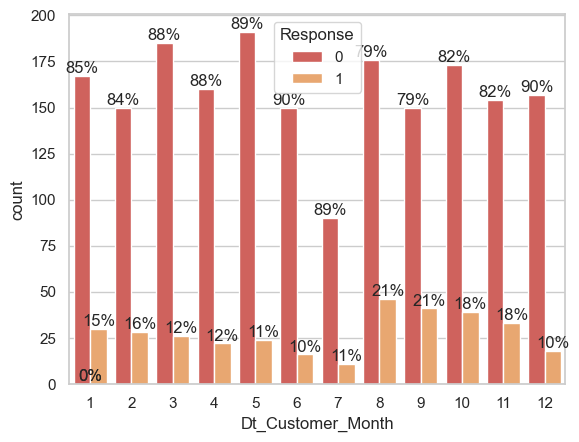

In [42]:
ax = sns.countplot(x='Dt_Customer_Month', hue='Response', data=data)
Barpect(data, 'Dt_Customer_Month', ax)

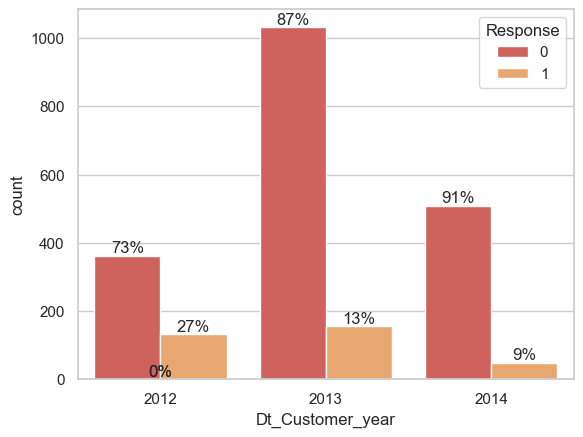

In [43]:
ax = sns.countplot(x='Dt_Customer_year', hue='Response', data=data)
Barpect(data, 'Dt_Customer_year', ax)

## Recency

<Axes: xlabel='Recency', ylabel='Count'>

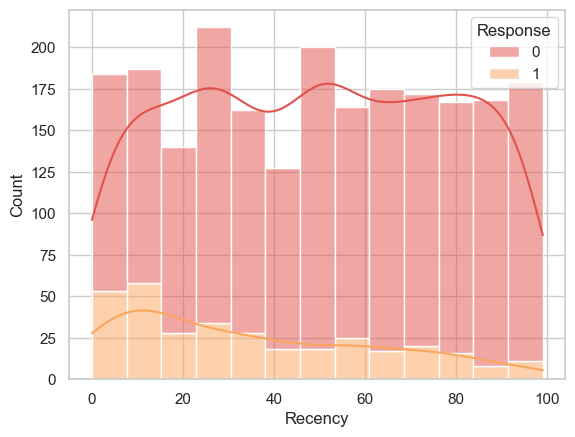

In [44]:
sns.histplot(data=data, x='Recency', hue='Response', multiple='stack', kde=True)

#Customer yang lama belum lama membeli, maka cenderung menerima penawaran campaign terbaru 

## Amount Spent

In [45]:
amt_spent_Feature = [c for c in data.columns if 'Mnt' in str(c)]
amt_spent_Feature.append('Response')

In [46]:
data[amt_spent_Feature].corr()[['Response']].sort_values(by = 'Response', ascending = False)

,Response
Response,1.000000
MntWines,0.247392
MntMeatProducts,0.236640
MntGoldProds,0.140693
MntFruits,0.125904
MntSweetProducts,0.117366
MntFishProducts,0.111415


In [47]:
# Make a new Column for show Amount by row 
amt_spent_Feature = [c for c in data.columns if 'Mnt' in str(c)]
data['TotalAmount_Spent'] = data[amt_spent_Feature].sum(axis=1)

<Axes: xlabel='TotalAmount_Spent', ylabel='Count'>

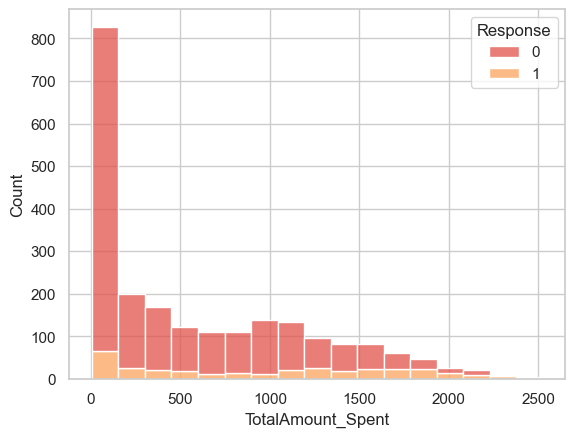

In [48]:
sns.histplot(data=data, kde=False, x='TotalAmount_Spent', hue='Response', multiple='stack')

# jika customer nge-sepnt money disekitaran  1000-2000 dolar, maka customer menerima campign

In [49]:
 data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country,Customer_age,Num_dependants,Dt_Customer_Month,Dt_Customer_year,TotalAmount_Spent
0,1826,1970,Graduation,Divorced,84835.0,0,0,2014-06-16,0,189,104,379,111,189,218,1,4,4,6,1,0,0,0,0,0,1,0,SP,44,0,6,2014,1190
1,1,1961,Graduation,Single,57091.0,0,0,2014-06-15,0,464,5,64,7,0,37,1,7,3,7,5,0,0,0,0,1,1,0,CA,53,0,6,2014,577
2,10476,1958,Graduation,Married,67267.0,0,1,2014-05-13,0,134,11,59,15,2,30,1,3,2,5,2,0,0,0,0,0,0,0,US,56,1,5,2014,251
3,1386,1967,Graduation,Together,32474.0,1,1,2014-05-11,0,10,0,1,0,0,0,1,1,0,2,7,0,0,0,0,0,0,0,AUS,47,2,5,2014,11
4,5371,1989,Graduation,Single,21474.0,1,0,2014-04-08,0,6,16,24,11,0,34,2,3,1,2,7,1,0,0,0,0,1,0,SP,25,1,4,2014,91


## Purchases

In [50]:
# Menggunakan List Comprasion
amt_purchases_Features = [c for c in data.columns if 'Purchases' in str(c)]
amt_purchases_Features.append('Response')

In [51]:
# see corelation column Purchases
data[amt_purchases_Features].corr()[['Response']].sort_values(by='Response', ascending=False)

,Response
Response,1.000000
NumCatalogPurchases,0.220894
NumWebPurchases,0.148453
NumStorePurchases,0.038855
NumDealsPurchases,0.001854


In [52]:
#make a new column 
amt_purchases_Features = [c for c in data.columns if 'Purchases' in str(c)]
data['Total_Purchases'] = data[amt_purchases_Features].sum(axis=1)

<Axes: xlabel='Total_Purchases', ylabel='Count'>

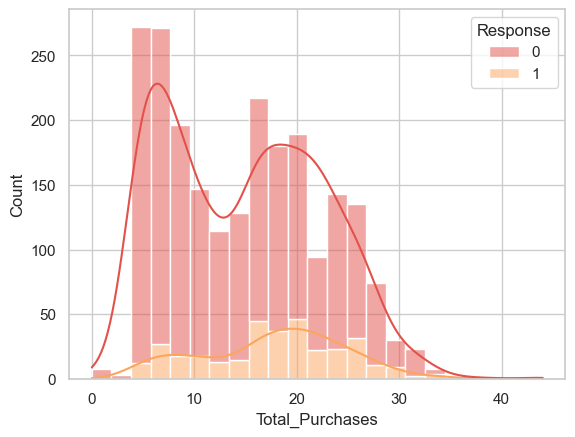

In [53]:
sns.histplot(data=data, kde=True, x='Total_Purchases', hue='Response', multiple='stack')


#Tidak ada pola unik atau pemisah antara responses 0 atau 1

In [54]:
data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country,Customer_age,Num_dependants,Dt_Customer_Month,Dt_Customer_year,TotalAmount_Spent,Total_Purchases
0,1826,1970,Graduation,Divorced,84835.0,0,0,2014-06-16,0,189,104,379,111,189,218,1,4,4,6,1,0,0,0,0,0,1,0,SP,44,0,6,2014,1190,15
1,1,1961,Graduation,Single,57091.0,0,0,2014-06-15,0,464,5,64,7,0,37,1,7,3,7,5,0,0,0,0,1,1,0,CA,53,0,6,2014,577,18
2,10476,1958,Graduation,Married,67267.0,0,1,2014-05-13,0,134,11,59,15,2,30,1,3,2,5,2,0,0,0,0,0,0,0,US,56,1,5,2014,251,11
3,1386,1967,Graduation,Together,32474.0,1,1,2014-05-11,0,10,0,1,0,0,0,1,1,0,2,7,0,0,0,0,0,0,0,AUS,47,2,5,2014,11,4
4,5371,1989,Graduation,Single,21474.0,1,0,2014-04-08,0,6,16,24,11,0,34,2,3,1,2,7,1,0,0,0,0,1,0,SP,25,1,4,2014,91,8


## Numweb Visit Month

In [55]:
# Use Base Correlation
data[['NumWebVisitsMonth', 'Response']].corr()[['Response']]

## Jika asil dari korelasi mendekati 0 atau - maka data tersebut tidak ada hubungan apapun pada customers

,Response
NumWebVisitsMonth,-0.004449
Response,1.000000


## Previuos campaign

In [56]:
data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country,Customer_age,Num_dependants,Dt_Customer_Month,Dt_Customer_year,TotalAmount_Spent,Total_Purchases
0,1826,1970,Graduation,Divorced,84835.0,0,0,2014-06-16,0,189,104,379,111,189,218,1,4,4,6,1,0,0,0,0,0,1,0,SP,44,0,6,2014,1190,15
1,1,1961,Graduation,Single,57091.0,0,0,2014-06-15,0,464,5,64,7,0,37,1,7,3,7,5,0,0,0,0,1,1,0,CA,53,0,6,2014,577,18
2,10476,1958,Graduation,Married,67267.0,0,1,2014-05-13,0,134,11,59,15,2,30,1,3,2,5,2,0,0,0,0,0,0,0,US,56,1,5,2014,251,11
3,1386,1967,Graduation,Together,32474.0,1,1,2014-05-11,0,10,0,1,0,0,0,1,1,0,2,7,0,0,0,0,0,0,0,AUS,47,2,5,2014,11,4
4,5371,1989,Graduation,Single,21474.0,1,0,2014-04-08,0,6,16,24,11,0,34,2,3,1,2,7,1,0,0,0,0,1,0,SP,25,1,4,2014,91,8


In [57]:
preven_acct = [c for c in data.columns if 'Accepted' in str(c)]
preven_acct.append('Response')

In [58]:
data[preven_acct].corr()[['Response']].sort_values(by='Response', ascending=False)

,Response
Response,1.000000
AcceptedCmp5,0.328182
AcceptedCmp1,0.293882
AcceptedCmp3,0.254144
AcceptedCmp4,0.176890
AcceptedCmp2,0.169249


## Complain

In [59]:
data[['Complain', 'Response']].corr()[['Response']]

#Tidak ada hubungan korelasi dengan campaign

,Response
Complain,0.000185
Response,1.000000


## Country

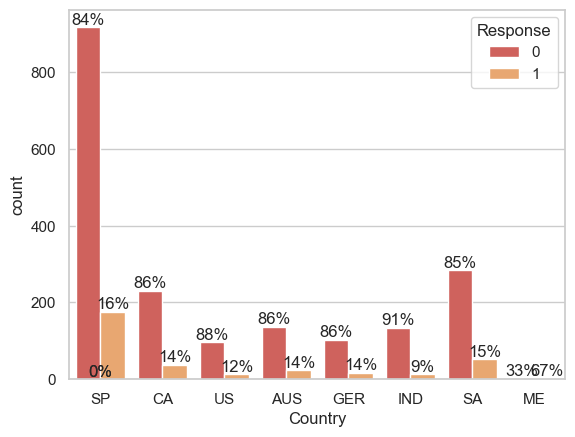

In [60]:
ax = sns.countplot(x='Country', hue='Response', data=data)
Barpect(data, 'Country', ax)

# Mesiko dan spain adalah negara yang cenderung yang menerima campaign terbanyak

# Modeling

## Data Splitting

 Dari data yang kita punya kita bagi menjadi beberapa bagian, tujuannya untuk mengevaluasi dari model yang kita punya.

 - Data Train : Karena ingin membuat machine learning, modeling kita mempelajari pola pola pada data tersebut. Mengambil 60%
 - Data Validation: Untuk nge evaluasi data yang sudah kita train. mengambil 20%
 - Data Test : untuk menguji evaluasi untuk ke 2x bahwasanya modelling yang kita kuat. mengambil 20%

In [61]:
data = pd.read_csv('marketing_data.csv')
data.shape

(2240, 28)

In [62]:
#library untuk membagi data 
from sklearn.model_selection import train_test_split

In [63]:
data_full_train, data_test = train_test_split(data, test_size=0.2, random_state = 1)
data_train, data_valid = train_test_split(data_full_train, test_size = 0.25, random_state = 1)

In [64]:
data_train.shape, data_test.shape, data_valid.shape

((1344, 28), (448, 28), (448, 28))

In [65]:
1344/2240, 448/2240, 448/2240

(0.6, 0.2, 0.2)

In [66]:
#melakukan data preprocessing dulu baru data splitting atau = jika kita melakukan ini maka akan terjadi Data leakage
#melakukan data spliting dulu baru data preprocessing

## Preprocessing

## Numeric Preprocessing

In [67]:
data_train.columns = data_train.columns.str.replace(' ', '')
data_valid.columns = data_valid.columns.str.replace(' ','')
data_test.columns = data_test.columns.str.replace(' ','')

In [68]:
data_train['Income'] = data_train['Income'].str.replace('$','')
data_train['Income'] = data_train['Income'].str.replace(',','')
data_train['Income'] = data_train['Income'].astype('float')

data_valid['Income'] = data_valid['Income'].str.replace('$','')
data_valid['Income'] = data_valid['Income'].str.replace(',','')
data_valid['Income'] = data_valid['Income'].astype('float')

data_test['Income'] = data_test['Income'].str.replace('$','')
data_test['Income'] = data_test['Income'].str.replace(',','')
data_test['Income'] = data_test['Income'].astype('float')

In [69]:
data_train['Dt_Customer'] = pd.to_datetime(data_train['Dt_Customer'])

data_valid['Dt_Customer'] = pd.to_datetime(data_valid['Dt_Customer'])

data_test['Dt_Customer'] = pd.to_datetime(data_test['Dt_Customer'])

In [70]:
data_train['Income'] = data_train['Income'].fillna(data_train['Income'].median())
data_valid['Income'] = data_valid['Income'].fillna(data_valid['Income'].median())
data_test['Income'] = data_test['Income'].fillna(data_test['Income'].median())

In [71]:
data_train = data_train[data_train['Year_Birth'] > 1900].reset_index(drop=True)
data_valid = data_valid[data_valid['Year_Birth'] > 1900].reset_index(drop=True)
data_test = data_test[data_test['Year_Birth'] > 1900].reset_index(drop=True)

In [72]:
data_train['Customer_age'] = data_train['Dt_Customer'].dt.year - data_train['Year_Birth']
data_valid['Customer_age'] = data_valid['Dt_Customer'].dt.year - data_valid['Year_Birth']
data_test['Customer_age'] = data_test['Dt_Customer'].dt.year - data_test['Year_Birth']

In [73]:
data_train['Marital_Status'] = data_train['Marital_Status'].apply(lambda x:'Single' if str(x) in ['YOLO', 'Alone', 'Absurd'] else str(x))
data_valid['Marital_Status'] = data_valid['Marital_Status'].apply(lambda x:'Single' if str(x) in ['YOLO', 'Alone', 'Absurd'] else str(x))
data_test['Marital_Status'] = data_test['Marital_Status'].apply(lambda x:'Single' if str(x) in ['YOLO', 'Alone', 'Absurd'] else str(x))

In [74]:
data_train['Num_dependants'] = data_train['Kidhome'] + data_train['Teenhome']
data_valid['Num_dependants'] = data_valid['Kidhome'] + data_valid['Teenhome']
data_test['Num_dependants'] = data_test['Kidhome'] + data_test['Teenhome']

In [75]:
data_train['Dt_Customer_Month'] = data_train['Dt_Customer'].dt.month
data_train['Dt_Customer_year'] = data_train['Dt_Customer'].dt.year

data_valid['Dt_Customer_Month'] = data_valid['Dt_Customer'].dt.month
data_valid['Dt_Customer_year'] = data_valid['Dt_Customer'].dt.year

data_test['Dt_Customer_Month'] = data_test['Dt_Customer'].dt.month
data_test['Dt_Customer_year'] = data_test['Dt_Customer'].dt.year

In [76]:
amt_spent_Feature = [c for c in data.columns if 'Mnt' in str(c)]
data_train['TotalAmount_Spent'] = data_train[amt_spent_Feature].sum(axis=1)
data_valid['TotalAmount_Spent'] = data_valid[amt_spent_Feature].sum(axis=1)
data_test['TotalAmount_Spent'] = data_test[amt_spent_Feature].sum(axis=1)

In [77]:
amt_purchases_Features = [c for c in data.columns if 'Purchases' in str(c)]
data_train['Total_Purchases'] = data_train[amt_purchases_Features].sum(axis=1)
data_valid['Total_Purchases'] = data_valid[amt_purchases_Features].sum(axis=1)
data_test['Total_Purchases'] = data_test[amt_purchases_Features].sum(axis=1)

In [78]:
display(data_train.head())
print()
display(data_valid.head())
print()
display(data_test.head())

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country,Customer_age,Num_dependants,Dt_Customer_Month,Dt_Customer_year,TotalAmount_Spent,Total_Purchases
0,3194,1974,PhD,Single,71466.0,0,0,2014-04-05,86,412,12,546,78,182,0,1,4,4,10,1,0,0,0,0,0,0,0,CA,40,0,4,2014,1230,19
1,3599,1970,Graduation,Married,63684.0,0,1,2012-11-26,61,575,80,428,208,93,80,3,8,4,8,5,0,0,0,0,0,0,0,SP,42,1,11,2012,1464,23
2,5300,1973,Master,Married,38961.0,1,0,2013-12-30,60,19,7,19,0,1,24,1,2,1,2,7,0,0,0,0,0,0,0,SP,40,1,12,2013,70,6
3,7022,1971,Graduation,Married,76445.0,1,0,2012-09-28,2,739,107,309,140,80,35,1,2,5,13,6,0,0,0,0,0,0,0,SA,41,1,9,2012,1410,21
4,1726,1970,Graduation,Single,22585.0,0,0,2013-03-18,23,3,9,15,13,2,39,1,1,1,2,9,1,0,0,0,0,1,0,SP,43,0,3,2013,81,5


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country,Customer_age,Num_dependants,Dt_Customer_Month,Dt_Customer_year,TotalAmount_Spent,Total_Purchases
0,7143,1955,2n Cycle,Together,74805.0,0,1,2013-11-06,14,209,162,209,41,162,37,5,4,7,10,2,0,0,0,0,0,0,0,SP,58,1,11,2013,820,26
1,6383,1971,PhD,Together,32892.0,1,0,2014-05-25,78,26,0,15,2,1,2,2,3,0,3,8,0,0,0,0,0,0,0,SA,43,1,5,2014,46,8
2,2853,1980,Graduation,Single,51766.0,1,0,2014-03-11,74,60,51,87,6,20,51,2,4,2,4,5,0,0,0,0,0,0,0,CA,34,1,3,2014,275,12
3,5393,1977,Graduation,Single,23763.0,1,0,2012-08-07,64,22,0,6,6,2,6,1,1,0,3,7,0,0,0,0,0,0,0,SP,35,1,8,2012,42,5
4,1340,1986,Graduation,Married,92910.0,0,0,2014-04-24,42,551,137,792,179,103,33,1,6,7,13,1,0,1,1,1,0,0,0,SP,28,0,4,2014,1795,27


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country,Customer_age,Num_dependants,Dt_Customer_Month,Dt_Customer_year,TotalAmount_Spent,Total_Purchases
0,9204,1970,Graduation,Widow,66731.0,0,1,2012-09-12,33,371,159,194,58,106,141,4,4,3,6,3,0,0,0,0,0,0,0,SP,42,1,9,2012,1029,17
1,1459,1966,PhD,Married,69063.0,0,1,2012-11-07,16,666,35,124,69,8,26,1,5,3,5,3,0,0,0,0,0,0,0,SP,46,1,11,2012,928,14
2,4971,1962,PhD,Together,31497.0,0,1,2012-12-06,22,108,1,28,13,1,4,2,3,1,4,8,0,0,0,0,0,0,0,SA,50,1,12,2012,155,10
3,3635,1962,PhD,Single,52597.0,0,1,2014-05-07,69,492,0,37,7,0,42,3,6,3,8,5,0,0,0,0,0,0,0,SA,52,1,5,2014,578,20
4,4769,1977,Master,Together,57954.0,1,1,2014-06-18,52,456,4,24,0,0,9,7,8,2,6,7,0,1,0,0,0,0,0,SP,37,2,6,2014,493,23


In [79]:
accpt_feat = [c for c in data.columns if 'AcceptedCmp' in str(c)]
Mnt_feat = [c for c in data.columns if 'Mnt' in str(c)]
Num_feat = [c for c in data.columns if 'Num' in str(c)]

In [80]:
numeric = ['Income', 'Kidhome', 'Teenhome', 'Recency', 'Complain', 'Customer_age', 
           'Num_dependants', 'Dt_Customer_Month', 'Dt_Customer_year', 'TotalAmount_Spent', 'Total_Purchases']

In [81]:
All_Numeric = accpt_feat + Mnt_feat + Num_feat + numeric

In [82]:
display(data_train[All_Numeric].head(2))
display(data_valid[All_Numeric].head(2))
display(data_test[All_Numeric].head(2))

,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Income,Kidhome,Teenhome,Recency,Complain,Customer_age,Num_dependants,Dt_Customer_Month,Dt_Customer_year,TotalAmount_Spent,Total_Purchases
0,0,0,0,0,0,412,12,546,78,182,0,1,4,4,10,1,71466.0,0,0,86,0,40,0,4,2014,1230,19
1,0,0,0,0,0,575,80,428,208,93,80,3,8,4,8,5,63684.0,0,1,61,0,42,1,11,2012,1464,23


,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Income,Kidhome,Teenhome,Recency,Complain,Customer_age,Num_dependants,Dt_Customer_Month,Dt_Customer_year,TotalAmount_Spent,Total_Purchases
0,0,0,0,0,0,209,162,209,41,162,37,5,4,7,10,2,74805.0,0,1,14,0,58,1,11,2013,820,26
1,0,0,0,0,0,26,0,15,2,1,2,2,3,0,3,8,32892.0,1,0,78,0,43,1,5,2014,46,8


,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Income,Kidhome,Teenhome,Recency,Complain,Customer_age,Num_dependants,Dt_Customer_Month,Dt_Customer_year,TotalAmount_Spent,Total_Purchases
0,0,0,0,0,0,371,159,194,58,106,141,4,4,3,6,3,66731.0,0,1,33,0,42,1,9,2012,1029,17
1,0,0,0,0,0,666,35,124,69,8,26,1,5,3,5,3,69063.0,0,1,16,0,46,1,11,2012,928,14


## Categoric Preprocessing

In [83]:
data_train.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country,Customer_age,Num_dependants,Dt_Customer_Month,Dt_Customer_year,TotalAmount_Spent,Total_Purchases
0,3194,1974,PhD,Single,71466.0,0,0,2014-04-05,86,412,12,546,78,182,0,1,4,4,10,1,0,0,0,0,0,0,0,CA,40,0,4,2014,1230,19
1,3599,1970,Graduation,Married,63684.0,0,1,2012-11-26,61,575,80,428,208,93,80,3,8,4,8,5,0,0,0,0,0,0,0,SP,42,1,11,2012,1464,23
2,5300,1973,Master,Married,38961.0,1,0,2013-12-30,60,19,7,19,0,1,24,1,2,1,2,7,0,0,0,0,0,0,0,SP,40,1,12,2013,70,6
3,7022,1971,Graduation,Married,76445.0,1,0,2012-09-28,2,739,107,309,140,80,35,1,2,5,13,6,0,0,0,0,0,0,0,SA,41,1,9,2012,1410,21
4,1726,1970,Graduation,Single,22585.0,0,0,2013-03-18,23,3,9,15,13,2,39,1,1,1,2,9,1,0,0,0,0,1,0,SP,43,0,3,2013,81,5


In [84]:
categoric_feat = ['Education', 'Marital_Status', 'Country']

In [85]:
all_feat = categoric_feat + All_Numeric

In [86]:
data_train_Final = data_train[all_feat]
data_valid_Final = data_valid[all_feat]
data_test_Final = data_test[all_feat]

Catgoric:
- Education: (Ordinal)
- Marital_Status: (nominal)
- Country : (nominal)

In [87]:
data_valid.Education.unique()

array(['2n Cycle', 'PhD', 'Graduation', 'Master', 'Basic'], dtype=object)

In [88]:
# Make Dictionary
education = {'Basic':1, 'Graduation':2, '2n cycle':3, 'Master':4, 'PhD':5}

In [89]:
# make mapping using fuction pandas
data_train_Final['Education'] = data_train_Final['Education'].map(education)
data_valid_Final['Education'] = data_valid_Final['Education'].map(education)
data_test_Final['Education'] = data_test_Final['Education'].map(education)

In [90]:
# Mengisi NaN dengan rata-rata (mean)
mean_value = data_train_Final['Education'].mean()
data_train_Final['Education'] = data_train_Final['Education'].fillna(mean_value).astype(int)

mean_value_valid = data_valid_Final['Education'].mean()
data_valid_Final['Education'] = data_valid_Final['Education'].fillna(mean_value_valid).astype(int)

mean_value_test = data_test_Final['Education'].mean()
data_test_Final['Education'] = data_test_Final['Education'].fillna(mean_value_test).astype(int)

In [91]:
data_train_Final.head()

,Education,Marital_Status,Country,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Income,Kidhome,Teenhome,Recency,Complain,Customer_age,Num_dependants,Dt_Customer_Month,Dt_Customer_year,TotalAmount_Spent,Total_Purchases
0,5,Single,CA,0,0,0,0,0,412,12,546,78,182,0,1,4,4,10,1,71466.0,0,0,86,0,40,0,4,2014,1230,19
1,2,Married,SP,0,0,0,0,0,575,80,428,208,93,80,3,8,4,8,5,63684.0,0,1,61,0,42,1,11,2012,1464,23
2,4,Married,SP,0,0,0,0,0,19,7,19,0,1,24,1,2,1,2,7,38961.0,1,0,60,0,40,1,12,2013,70,6
3,2,Married,SA,0,0,0,0,0,739,107,309,140,80,35,1,2,5,13,6,76445.0,1,0,2,0,41,1,9,2012,1410,21
4,2,Single,SP,1,0,0,0,0,3,9,15,13,2,39,1,1,1,2,9,22585.0,0,0,23,0,43,0,3,2013,81,5


In [92]:
from sklearn.feature_extraction import DictVectorizer

# melakukan OneHotEncoding

In [93]:
# Mendifind DV
dv = DictVectorizer(sparse = False)

In [94]:
# Untuk menggunakan DictVectorizer harus mengubah DataFrame menjadi Dictonari
data_train_final_dict = data_train_Final.to_dict(orient = 'records')
data_valid_final_dict = data_valid_Final.to_dict(orient = 'records')
data_test_final_dict = data_test_Final.to_dict(orient = 'records')

In [95]:
# untuk melakukan Fitting data di dataset Train
data_train_final_dict = dv.fit_transform(data_train_final_dict)

In [96]:
#jika sudah pada bagian train maka tidak perlu melakukan Fit lagii
data_valid_final_dict = dv.transform(data_valid_final_dict)
data_test_final_dict = dv.transform(data_test_final_dict) 

In [97]:
data_test_final_dict

array([[0.000e+00, 0.000e+00, 0.000e+00, ..., 1.000e+00, 1.029e+03,
        1.700e+01],
       [0.000e+00, 0.000e+00, 0.000e+00, ..., 1.000e+00, 9.280e+02,
        1.400e+01],
       [0.000e+00, 0.000e+00, 0.000e+00, ..., 1.000e+00, 1.550e+02,
        1.000e+01],
       ...,
       [0.000e+00, 0.000e+00, 0.000e+00, ..., 1.000e+00, 3.050e+02,
        1.300e+01],
       [0.000e+00, 0.000e+00, 0.000e+00, ..., 1.000e+00, 1.701e+03,
        2.600e+01],
       [0.000e+00, 0.000e+00, 1.000e+00, ..., 0.000e+00, 6.100e+01,
        7.000e+00]])

In [98]:
# pada awalnya get_feature_names sudah berganti menjadi get_feature_out() karena ini versi teratas
dv.get_feature_names_out()

array(['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4',
       'AcceptedCmp5', 'Complain', 'Country=AUS', 'Country=CA',
       'Country=GER', 'Country=IND', 'Country=ME', 'Country=SA',
       'Country=SP', 'Country=US', 'Customer_age', 'Dt_Customer_Month',
       'Dt_Customer_year', 'Education', 'Income', 'Kidhome',
       'Marital_Status=Divorced', 'Marital_Status=Married',
       'Marital_Status=Single', 'Marital_Status=Together',
       'Marital_Status=Widow', 'MntFishProducts', 'MntFruits',
       'MntGoldProds', 'MntMeatProducts', 'MntSweetProducts', 'MntWines',
       'NumCatalogPurchases', 'NumDealsPurchases', 'NumStorePurchases',
       'NumWebPurchases', 'NumWebVisitsMonth', 'Num_dependants',
       'Recency', 'Teenhome', 'TotalAmount_Spent', 'Total_Purchases'],
      dtype=object)

In [99]:
# jika ingin membalikan menjadi DataFrame 

data_train_final = pd.DataFrame(data_train_final_dict, columns = dv.get_feature_names_out())

In [100]:
data_valid_final = pd.DataFrame(data_valid_final_dict, columns = dv.get_feature_names_out())
data_test_final = pd.DataFrame(data_test_final_dict, columns = dv.get_feature_names_out())

In [101]:
data_valid_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 447 entries, 0 to 446
Data columns (total 41 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   AcceptedCmp1             447 non-null    float64
 1   AcceptedCmp2             447 non-null    float64
 2   AcceptedCmp3             447 non-null    float64
 3   AcceptedCmp4             447 non-null    float64
 4   AcceptedCmp5             447 non-null    float64
 5   Complain                 447 non-null    float64
 6   Country=AUS              447 non-null    float64
 7   Country=CA               447 non-null    float64
 8   Country=GER              447 non-null    float64
 9   Country=IND              447 non-null    float64
 10  Country=ME               447 non-null    float64
 11  Country=SA               447 non-null    float64
 12  Country=SP               447 non-null    float64
 13  Country=US               447 non-null    float64
 14  Customer_age             4

## Modelling

-X : Independet Variable
-Y : dependent varible (Target varible) --> response 

In [102]:
x_train_final = data_train_Final
x_valid_final = data_valid_Final
x_test_final = data_test_Final

In [103]:
y_train = data_train.Response
y_valid = data_valid.Response
y_test = data_test.Response

## Base Model

### Logistic Regression

In [104]:
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import roc_auc_score

In [105]:
# Cek ulang apakah ada kolom yang belum diubah menjadi numerik
print(x_train_final.select_dtypes(include=['object']).columns)

Index(['Marital_Status', 'Country'], dtype='object')


In [106]:
# Mengecek tipe data di setiap kolom
print(x_valid_final.dtypes)

# Mengecek apakah ada data yang bukan numerik
print(x_valid_final.applymap(np.isreal).all())

Education                int64
Marital_Status          object
Country                 object
AcceptedCmp3             int64
AcceptedCmp4             int64
AcceptedCmp5             int64
AcceptedCmp1             int64
AcceptedCmp2             int64
MntWines                 int64
MntFruits                int64
MntMeatProducts          int64
MntFishProducts          int64
MntSweetProducts         int64
MntGoldProds             int64
NumDealsPurchases        int64
NumWebPurchases          int64
NumCatalogPurchases      int64
NumStorePurchases        int64
NumWebVisitsMonth        int64
Income                 float64
Kidhome                  int64
Teenhome                 int64
Recency                  int64
Complain                 int64
Customer_age             int64
Num_dependants           int64
Dt_Customer_Month        int32
Dt_Customer_year         int32
TotalAmount_Spent        int64
Total_Purchases          int64
dtype: object
Education               True
Marital_Status         Fals

In [107]:
# Mengubah kolom 'Marital_Status' dan 'Country' menjadi One-Hot Encoding
x_train_final = pd.get_dummies(x_train_final, columns=['Marital_Status', 'Country'], drop_first=True)

# Mengecek apakah konversi sudah berhasil
print(x_train_final.head())

   Education  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  \
0          5             0             0             0             0   
1          2             0             0             0             0   
2          4             0             0             0             0   
3          2             0             0             0             0   
4          2             1             0             0             0   

   AcceptedCmp2  MntWines  MntFruits  MntMeatProducts  MntFishProducts  \
0             0       412         12              546               78   
1             0       575         80              428              208   
2             0        19          7               19                0   
3             0       739        107              309              140   
4             0         3          9               15               13   

   MntSweetProducts  MntGoldProds  NumDealsPurchases  NumWebPurchases  \
0               182             0                

In [108]:
# Mengubah kolom 'Marital_Status' dan 'Country' menjadi One-Hot Encoding
x_valid_final = pd.get_dummies(x_valid_final, columns=['Marital_Status', 'Country'], drop_first=True)

# Mengecek apakah konversi sudah berhasil
print(x_train_final.head())

   Education  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  \
0          5             0             0             0             0   
1          2             0             0             0             0   
2          4             0             0             0             0   
3          2             0             0             0             0   
4          2             1             0             0             0   

   AcceptedCmp2  MntWines  MntFruits  MntMeatProducts  MntFishProducts  \
0             0       412         12              546               78   
1             0       575         80              428              208   
2             0        19          7               19                0   
3             0       739        107              309              140   
4             0         3          9               15               13   

   MntSweetProducts  MntGoldProds  NumDealsPurchases  NumWebPurchases  \
0               182             0                

In [109]:
model = LogisticRegression(random_state=42)
model.fit(x_valid_final, y_valid)

LogisticRegression(random_state=42)

In [110]:
# Mengubah kolom 'Marital_Status' dan 'Country' menjadi One-Hot Encoding
missing_cols = set(model.feature_names_in_) - set(x_test_final.columns)
print(f"Missing columns: {missing_cols}")


Missing columns: {'Marital_Status_Single', 'Country_SA', 'Country_IND', 'Country_SP', 'Country_CA', 'Marital_Status_Widow', 'Marital_Status_Together', 'Marital_Status_Married', 'Country_GER', 'Country_US'}


In [111]:
y_valid_pred = model.predict_proba(x_valid_final)[:, 1]  # Ambil probabilitas untuk kelas positif
print('Logistic Regression ROCAUC Result', roc_auc_score(y_valid, y_valid_pred).round(3))

Logistic Regression ROCAUC Result 0.775


### RandomForest

In [112]:
from sklearn.ensemble import RandomForestClassifier

In [113]:
model = RandomForestClassifier(random_state=42)
model.fit(x_valid_final, y_valid)

RandomForestClassifier(random_state=42)

In [114]:
y_valid_pred = model.predict_proba(x_valid_final)[:, 1]  # Ambil probabilitas untuk kelas positif
print('RandomForest ROCAUC Result', roc_auc_score(y_valid, y_valid_pred).round(3))

RandomForest ROCAUC Result 1.0


In [115]:
#### Setelah melakukan Base Model yaitu melakukan HyperParameter Tuning tidak melakukan itu karena itu tahap Data Scientist

### Karena kita sedang melakukan Data Analyst yaitu hanya mengetahui parameternya saja

## Performance Stability Check

In [116]:
x_train_full = pd.concat([x_train_final, x_valid_final])
y_train_full = pd.concat([y_train, y_valid])

In [117]:
model = RandomForestClassifier(random_state=42)
model.fit(x_train_full, y_train_full)

RandomForestClassifier(random_state=42)

In [118]:
print(x_valid_final.columns)

Index(['Education', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5',
       'AcceptedCmp1', 'AcceptedCmp2', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'Income', 'Kidhome', 'Teenhome', 'Recency', 'Complain', 'Customer_age',
       'Num_dependants', 'Dt_Customer_Month', 'Dt_Customer_year',
       'TotalAmount_Spent', 'Total_Purchases', 'Marital_Status_Married',
       'Marital_Status_Single', 'Marital_Status_Together',
       'Marital_Status_Widow', 'Country_CA', 'Country_GER', 'Country_IND',
       'Country_SA', 'Country_SP', 'Country_US'],
      dtype='object')


In [119]:
y_train_pred = model.predict_proba(x_train_final)[:, 1]  # Ambil probabilitas untuk kelas positif
print('RandomForest ROCAUC Result', roc_auc_score(y_train, y_train_pred).round(3))

RandomForest ROCAUC Result 1.0


## Intrepretation

In [120]:
import shap

In [121]:
# Menghitung Shap Values
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(x_train_final)

In [122]:
print("Shape of shap_values[1]:", shap_values[1].shape)
print("Shape of x_train_final:", x_train_final.shape)

Shape of shap_values[1]: (39, 2)
Shape of x_train_final: (1343, 39)
